In [43]:
import pandas as pd
import numpy as np

In [44]:
data = pd.read_csv("Diabetes with Population Info by County 2017.csv") # importing data

In [45]:
data.head() #checking data out

,County,State,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,...,sex and age_total population_21 years and over,sex and age_total population_62 years and over,sex and age_total population_65 years and over,sex and age_total population_18 years and over_1,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female
0,Autauga County,Alabama,1001,5178,13489,12525,76.5,55200,54170,1030,...,39614,9403,8050,41831,20054,21777,92.1,8050,3488,4562
1,Baldwin County,Alabama,1003,16707,48542,40024,86.6,208107,204535,3572,...,155502,49811,40665,162430,78104,84326,92.6,40665,18870,21795
2,Barbour County,Alabama,1005,3400,8009,5431,76.2,25782,25429,353,...,19394,5658,4634,20346,10923,9423,115.9,4634,2004,2630
3,Bibb County,Alabama,1007,2371,6534,5827,80.5,22527,22340,187,...,16864,4323,3661,17868,9578,8290,115.5,3661,1633,2028
4,Blount County,Alabama,1009,6282,14227,14365,79.7,57645,56710,935,...,42232,12400,10233,44177,21595,22582,95.6,10233,4540,5693


In [46]:
data.info(verbose = True) #checking data types and variables, 
                          # seems like Diabetes_Number (and some others) are not integers...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 95 columns):
 #   Column                                                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                                                --------------  -----  
 0   County                                                                                                                                                3220 non-null   object 
 1   State                                                                                                                                                 3220 non-null   object 
 2   CountyFIPS                                                                                                                                            3220 non-null   int64 

In [47]:
#data.Diabetes_Number = data.Diabetes_Number.astype(int) # gets error bc of "No Data" value, not coercable to an integer

In [48]:
clean = data[data.Diabetes_Number != "Suppressed"] 
clean = clean[clean.Obesity_Number != "No Data"]
clean = clean[clean.iloc[:,6] != "-"]
# cleaning data to drop these rows bc we can't do anything with them

In [49]:
clean.iloc[:,3:6] = clean.iloc[:,3:6].astype(int) 
clean.iloc[:,6] = clean.iloc[:,6].astype(float)
# making all number columns into integer or float data types

In [50]:
clean.info(verbose = True) # double checking data types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3112 entries, 0 to 3219
Data columns (total 95 columns):
 #   Column                                                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                                                --------------  -----  
 0   County                                                                                                                                                3112 non-null   object 
 1   State                                                                                                                                                 3112 non-null   object 
 2   CountyFIPS                                                                                                                                            3112 non-null   int64 

In [51]:
clean.select_dtypes(include = "object").head()

,County,State
0,Autauga County,Alabama
1,Baldwin County,Alabama
2,Barbour County,Alabama
3,Bibb County,Alabama
4,Blount County,Alabama


From https://www.mayoclinic.org/diseases-conditions/diabetes/symptoms-causes/syc-20371444

Risk factors for prediabetes and type 2 diabetes

Researchers don't fully understand why some people develop prediabetes and type 2 diabetes and others don't. It's clear that certain factors increase the risk, however, including:

Weight. The more fatty tissue you have, the more resistant your cells become to insulin.
Inactivity. The less active you are, the greater your risk. Physical activity helps you control your weight, uses up glucose as energy and makes your cells more sensitive to insulin. 

Family history. Your risk increases if a parent or sibling has type 2 diabetes.

Race or ethnicity. Although it's unclear why, certain people — including Black, Hispanic, American Indian and Asian American people — are at higher risk.

Age. Your risk increases as you get older. This may be because you tend to exercise less, lose muscle mass and gain weight as you age. But type 2 diabetes is also increasing among children, adolescents and younger adults.

Gestational diabetes. If you developed gestational diabetes when you were pregnant, your risk of developing prediabetes and type 2 diabetes later increases. If you gave birth to a baby weighing more than 9 pounds (4 kilograms), you're also at risk of type 2 diabetes.

Polycystic ovary syndrome. For women, having polycystic ovary syndrome — a common condition characterized by irregular menstrual periods, excess hair growth and obesity — increases the risk of diabetes.
High blood pressure. Having blood pressure over 140/90 millimeters of mercury (mm Hg) is linked to an increased risk of type 2 diabetes.

Abnormal cholesterol and triglyceride levels. If you have low levels of high-density lipoprotein (HDL), or "good," cholesterol, your risk of type 2 diabetes is higher. Triglycerides are another type of fat carried in the blood. People with high levels of triglycerides have an increased risk of type 2 diabetes. Your doctor can let you know what your cholesterol and triglyceride levels are.

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# Graphs
Y axis is always diabetes rates (diabetes number divided by total population) in these scatter plots. 

Looking at a few different potential relationships based on the Mayo clinic info (obesity, physical inactivity, age, and race/ethnicity). 

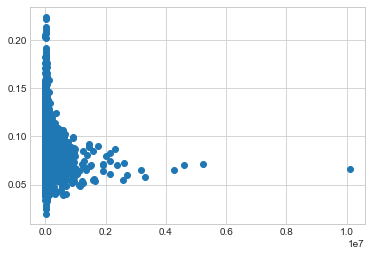

In [53]:
plt.plot(clean.iloc[:,7], clean.Diabetes_Number/clean.iloc[:,64], 'o');
# just trying to see if population size itself is correlated w/ diabetes rates 
# (it's not lol)

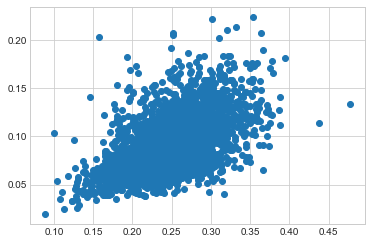

In [54]:
plt.plot(clean.Obesity_Number.astype(int)/clean.iloc[:,64], clean.Diabetes_Number/clean.iloc[:,64], 'o');

# Seems like somewhat linear relationship between obesity rates and diabetes rates? 



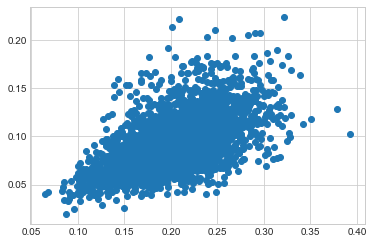

In [55]:
plt.plot(clean.Physical_Inactivity_Number/clean.iloc[:,64], clean.Diabetes_Number/clean.iloc[:,64], 'o');
# Relationship between physical inactivity rates and diabetes rates
# Somewhat linear too!

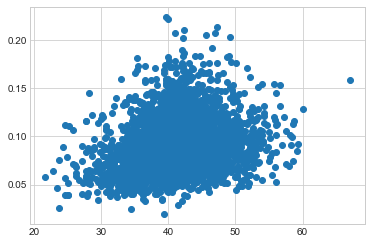

In [56]:
plt.plot(clean.iloc[:,81], clean.Diabetes_Number/clean.iloc[:,64], 'o');
# looks like median age doesn't say too much

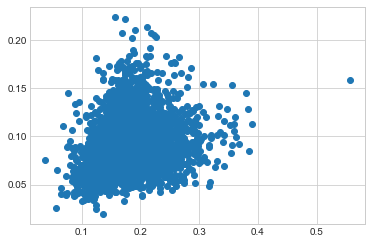

In [57]:
plt.plot(clean.iloc[:,87]/clean.iloc[:,64], clean.Diabetes_Number/clean.iloc[:,64], 'o');
# proportion of population 65 yrs and older
# vaguely linear...

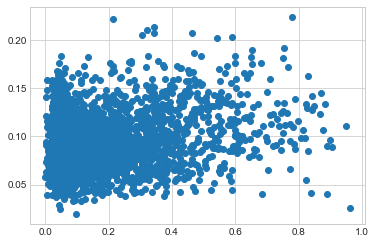

In [58]:
whiteproportion = clean.iloc[:,11]/clean.iloc[:,7]

plt.plot((1 - whiteproportion), clean.Diabetes_Number/clean.iloc[:,64], 'o');

# the proportion of the county population that is NOT monoracial white 
# doesn't seem to be strongly correlated

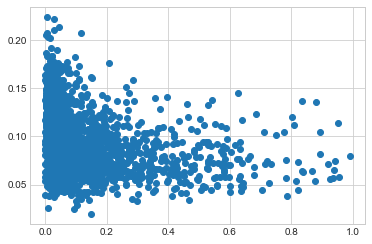

In [59]:
hispanicproportion = clean.iloc[:,45]/clean.iloc[:,44]
plt.plot(hispanicproportion, clean.Diabetes_Number/clean.iloc[:,44], 'o');
# proportion of county population that is hispanic (of any race)

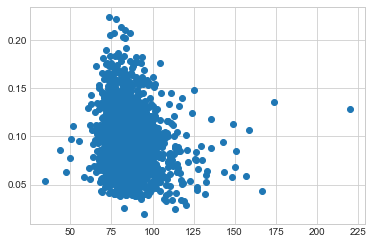

In [60]:
plt.plot(clean.iloc[:,6], clean.Diabetes_Number/clean.iloc[:,44], 'o');
# sex ratio (males per 100 females), above 65
# also doesn't seem to be strongly correlated

# Prepare to fit models

In [61]:
from sklearn import preprocessing

In [62]:
# normalizing all the data 
# (pulled from https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame)

clean2 = clean.drop(["County", "CountyFIPS", "Diabetes_Number"], 1) # dropping county labels and the dependent variable
clean2 = pd.get_dummies(clean2) # dummifying the state feature 

# normalizing features 

#MONICA TO ADD 
min_max_scaler = preprocessing.MinMaxScaler()
##

X = pd.DataFrame(min_max_scaler.fit_transform(clean2), columns=clean2.columns, index=clean2.index) 




    
# making y    
y = clean.Diabetes_Number


In [63]:
# double check data 

X.info(verbose = True)
y

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3112 entries, 0 to 3219
Data columns (total 142 columns):
 #   Column                                                                                                                                                Dtype  
---  ------                                                                                                                                                -----  
 0   Obesity_Number                                                                                                                                        float64
 1   Physical_Inactivity_Number                                                                                                                            float64
 2   sex and age_total population_65 years and over_sex ratio (males per 100 females)                                                                      float64
 3   race_total population                                                   

0        5178
1       16707
2        3400
3        2371
4        6282
        ...  
3215     2560
3216      439
3217     1440
3218      637
3219      601
Name: Diabetes_Number, Length: 3112, dtype: int64

## 3.2 Partition Data

In [64]:
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [65]:
# set the random seed
np.random.seed(10)

# split the data into training and test data
# train_test_split returns 4 values: X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80)

In [66]:
# then split the training data for cross validation (actual training data and then cross-validation set)
# Returns 4 values: X_train, X_validate, y_train, y_validate

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, train_size=0.75)

# 3.3 Feature Selection

In [67]:
import matplotlib.pyplot as plt
import statsmodels.graphics.api as smg

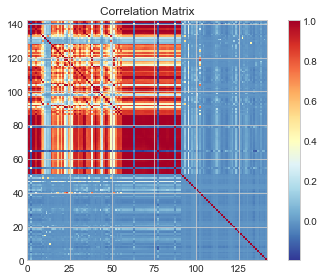

In [68]:
#from https://www.statsmodels.org/stable/generated/statsmodels.graphics.correlation.plot_corr.html#statsmodels.graphics.correlation.plot_corr
# checking pairwise correlation for all the Xs 
# seems to be that a lot of the county population features are highly correlated 
# and all the less correlated features are probably the dummies for each of the states

corr_matrix = np.corrcoef(X_train.T)
smg.plot_corr(corr_matrix)
plt.show()

In [69]:
# checking correlation with Obesity Number
# not sure what is too high to drop... I think if we are only concerned w/ prediction correlation doesn't matter, 
# but anything more than 0.95 correlation seems way too high 

# can play around with this to see what variables drop out!

corrs = corr_matrix[0,:] < 0.95

corrs[0] = True

print(X_train.columns[~corrs]) # these are the variables to be dropped (bc they have almost perfect correlation)

# makes sense that Physical_Inactivity will be dropped
# makes sense that a lot that are being dropped are measures of size of whole population
    # e.g., all total population counts, total monoracial population, total citizens

Index(['Physical_Inactivity_Number', 'race_total population',
       'race_total population_one race', 'race_total population_one race_1',
       'race_total population_one race_white',
       'race alone or in combination with one or more other races_total population',
       'race alone or in combination with one or more other races_total population_white',
       'hispanic or latino and race_total population',
       'hispanic or latino and race_total population_not hispanic or latino',
       'total housing units',
       'citizen -  voting age population_citizen -  18 and over population',
       'citizen -  voting age population_citizen -  18 and over population_male',
       'citizen -  voting age population_citizen -  18 and over population_female',
       'sex and age_total population', 'sex and age_total population_male',
       'sex and age_total population_female',
       'sex and age_total population_under 5 years',
       'sex and age_total population_5 to 9 years',
     

In [70]:
# taking out all features that have a correlation higher than 0.95, 101 features remain

X_train = X_train[X_train.columns[corrs]]
X_validate = X_validate[X_validate.columns[corrs]]
X_train.info(verbose = True) 

# makes sense that a lot of the subgroup features are left (e.g., total Black population) 
# and also all(?) the state dummy variables 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1866 entries, 3000 to 1016
Data columns (total 101 columns):
 #   Column                                                                                                                                                Dtype  
---  ------                                                                                                                                                -----  
 0   Obesity_Number                                                                                                                                        float64
 1   sex and age_total population_65 years and over_sex ratio (males per 100 females)                                                                      float64
 2   race_total population_two or more races                                                                                                               float64
 3   race_total population_one race_black or african american             

# 4 Train Models

## Just trying out a normal OLS

In [71]:
# just gonna run a normal OLS and see what happens

lin_reg = LinearRegression(normalize=True)

# fit the model
lin_model = lin_reg.fit(X_train, y_train)

In [72]:
print(lin_model.coef_)
print(lin_model.intercept_)

[ 4.47570251e+05 -2.72613178e+03 -1.27830357e+06 -5.50138667e+06
 -1.44500941e+05  3.57290266e+03 -8.52461874e+00  6.61574748e+02
  6.65765779e+02  2.25082891e+05  8.32811571e+04  3.17235972e+05
  2.61997348e+05  1.15301940e+05  2.04232914e+05  1.65852866e+05
  8.22376626e+04 -1.65773043e+05 -2.93019430e+05  1.07065401e+04
 -1.97952512e+04 -5.64766801e+04 -1.28883290e+07 -1.27830357e+06
  1.37617569e+05  2.29353306e+05  4.64937711e+05  8.53462258e+03
  5.13846243e+06  2.65427457e+05  1.23780868e+06  1.65740468e+06
  1.35444321e+07  2.42514383e+04  2.37842345e+04  3.52558977e+03
  8.68840154e+01  2.50520513e+04  6.01977122e+04  5.93208435e+05
  9.27790253e+03 -2.15646715e+06 -3.39826690e+05  1.76686316e+04
 -1.98298401e+03 -7.73954169e+03 -1.61855453e+03 -8.66475065e+02
  2.79798724e+03 -8.24117058e+02  5.69628653e+02  3.50995238e+02
  3.51573496e+01  1.90226084e+02  1.86025745e+03 -8.84660446e+02
 -3.09749712e+03  8.95551366e+02 -1.77831670e+03  2.96169569e+03
  1.24127808e+02  4.18566

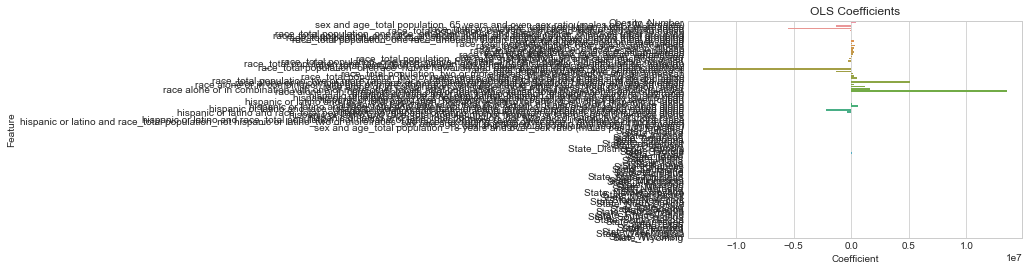

In [73]:
# Create a dataframe with the coefficient and feature names
# this is unintelligible with 101 variables lmao

lin_reg_data = pd.DataFrame([lin_model.coef_, X_train.columns]).T
lin_reg_data.columns = ['Coefficient', 'Feature']
# Plot
ax = sns.barplot(x="Coefficient", y="Feature", data=lin_reg_data)
ax.set_title("OLS Coefficients")
plt.savefig('plot.png', dpi=300)

# some of these coefficients seem high since y is normalized, but maybe not an issue bc prediction...


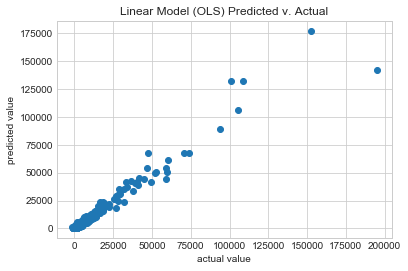

In [74]:
# predict the number of diabetes, using OLS parameters
lin_pred = lin_model.predict(X_validate)

# plot the residuals on a scatter plot
plt.scatter(lin_pred, y_validate)
plt.title('Linear Model (OLS) Predicted v. Actual')
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.show()


# this looks decent !! but can maybe do better w/ lasso? 

In [75]:
def rmse(pred, actual):
    return pow(np.mean(pow((pred-actual), 2)), 0.5)

In [76]:
rmse(lin_pred, y_validate)

3332.950219208833

## Trying out lasso

In [77]:
for a in np.arange(0,1,0.1):
    print(a)

0.0
0.1
0.2
0.30000000000000004
0.4
0.5
0.6000000000000001
0.7000000000000001
0.8
0.9


In [78]:
# trying out lasso (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)
from sklearn import linear_model

clf_list = []

# iterating between different tuning parameters from 0 to 2 and collecting in clf_list

for a in np.arange(0,2,0.1):
    x = linear_model.Lasso(alpha=a)
    x.fit(X_train, y_train)
    clf_list.append(x)
    
    #print(clf_list[a-1].coef_)
    #print(clf_list[a-1].intercept_)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2790798066.3891516, tolerance: 119500862.62358165
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 537267709.5721164, tolerance: 119500862.62358165
  positive)
/opt/anacond

In [79]:
for x in clf_list:
    print(x.coef_[x.coef_ > 0])

[4.90897556e+05 1.08417886e+05 3.44779040e+04 6.33201192e+03
 2.90423972e+03 4.39230794e+04 3.25957209e+04 6.87336713e+04
 3.27055816e+04 1.97707710e+04 2.32064725e+04 1.20361717e+04
 3.74654523e+04 1.39198372e+03 1.08238920e+05 9.23461539e+03
 1.24649061e+05 1.39348735e+05 9.23796311e+03 1.55789207e+03
 1.25151779e+03 4.24072922e+04 2.29146674e+04 1.16988699e+04
 2.93349875e+03 6.72775791e+02 2.54184713e+02 4.58326634e+02
 4.02627048e+02 1.66150065e+03 8.70012033e+02 3.16182230e+03
 2.49202367e+02 2.58523090e+04 7.95742820e+01 1.78874520e+02
 1.25264987e+02 2.30256841e+02 1.42140586e+02 6.20393377e+01
 2.56149201e+02 4.89135923e+02 5.61139128e+02 4.13417505e+02
 5.78246139e+01 8.57329390e+02 2.85944999e+02 2.22596871e+02
 2.90083342e+02 2.14436898e+02]
[4.50532775e+05 5.80458153e+04 4.11396634e+03 2.91912014e+03
 5.74540658e+04 1.23365208e+04 4.49309442e+04 4.45121933e+04
 3.20364999e+04 3.00495952e+04 1.48793258e+04 1.05238328e+03
 3.34526000e+04 5.00597884e+04 1.40326072e+04 1.04252

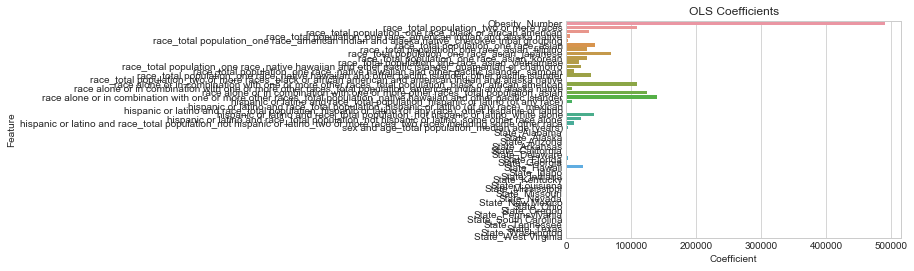

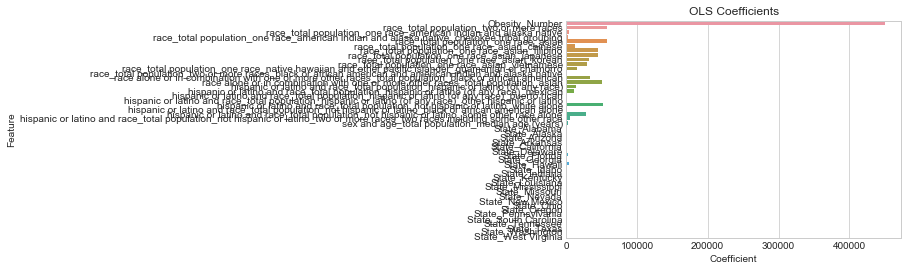

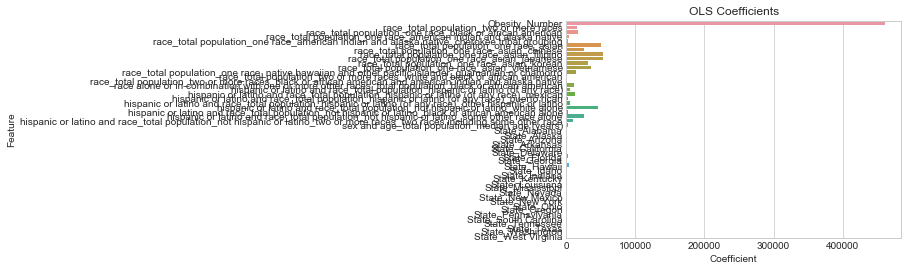

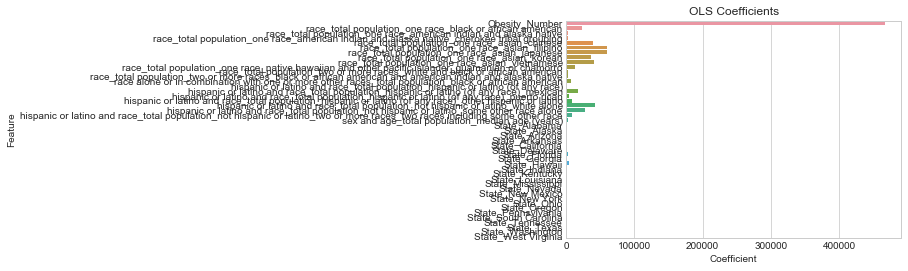

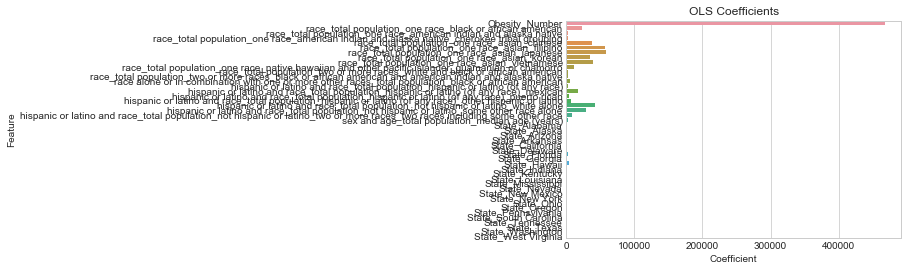

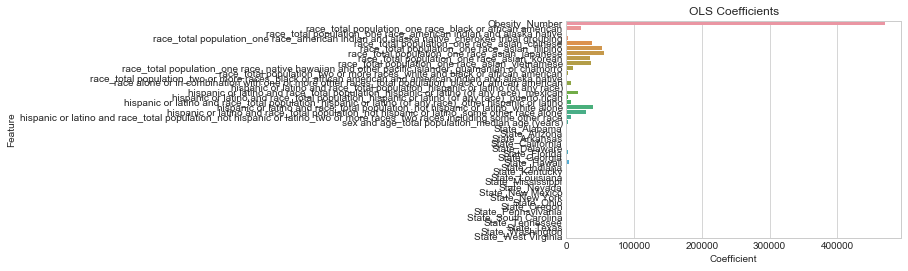

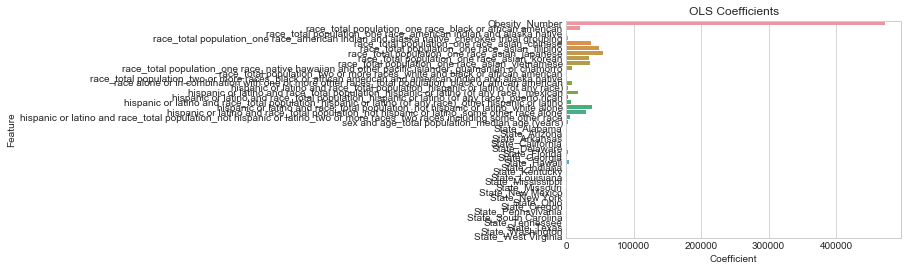

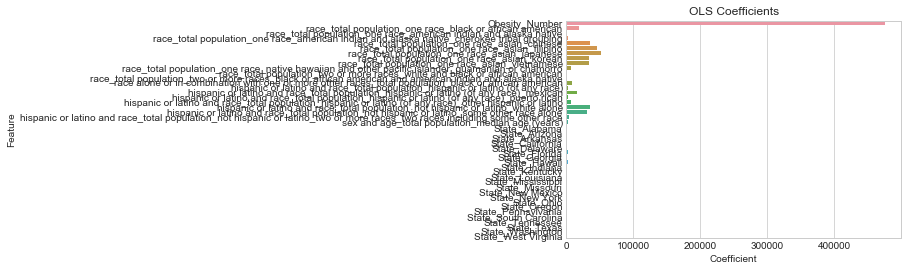

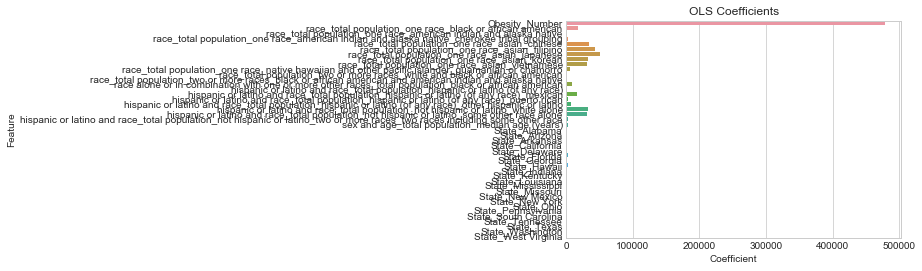

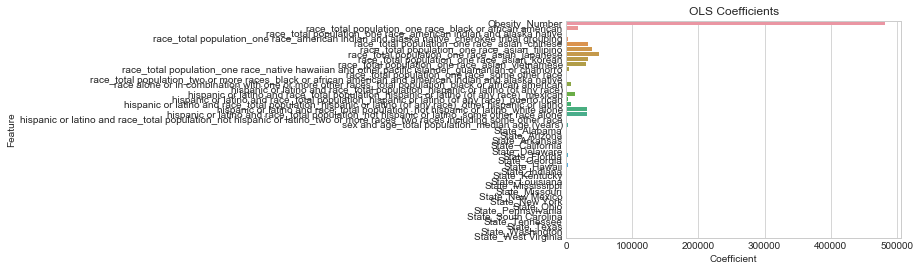

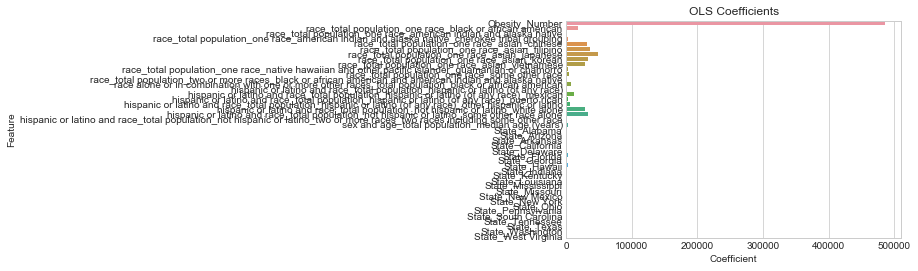

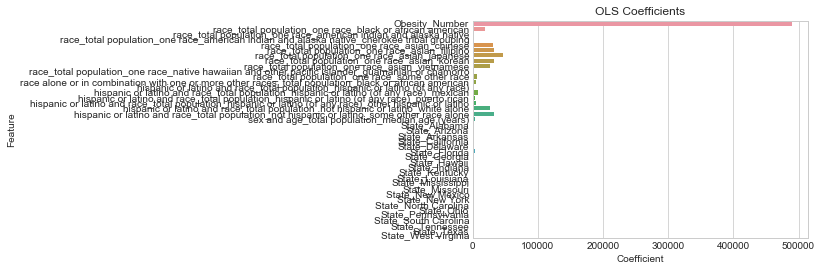

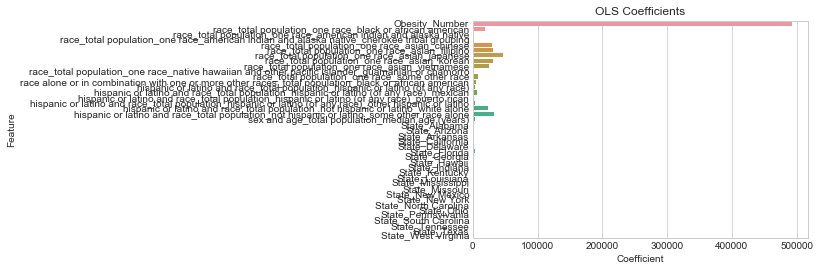

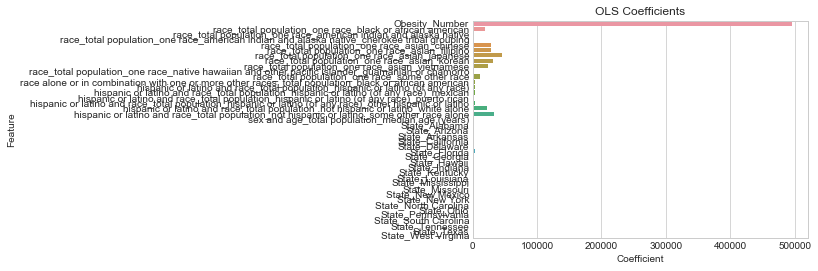

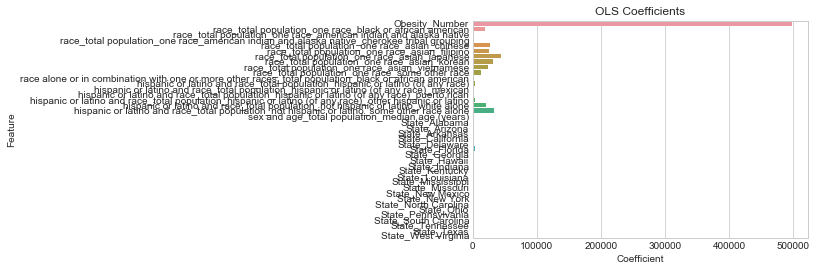

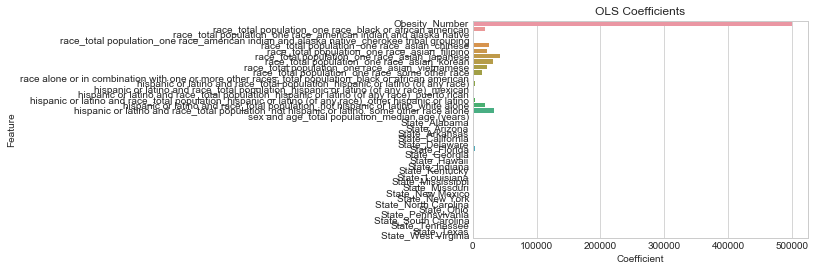

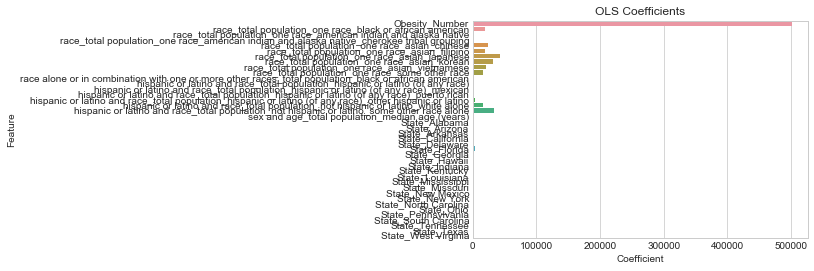

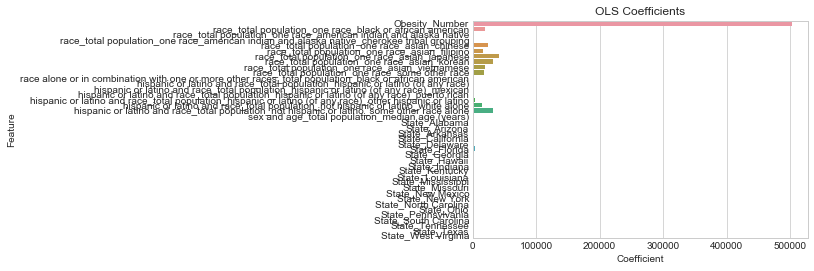

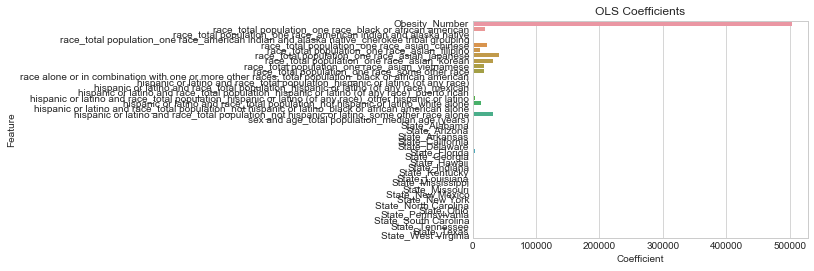

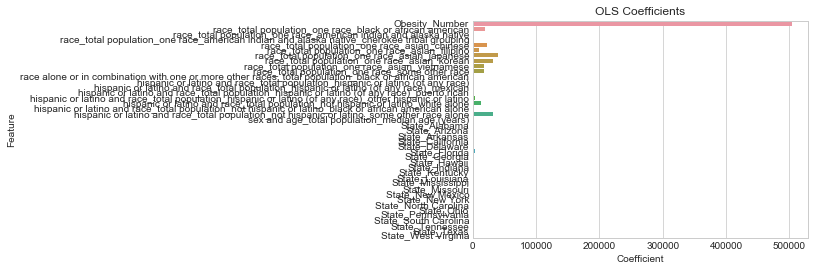

In [80]:
# lasso regression
# Create a dataframe with the coefficient and feature names

for x in clf_list:

    lin_reg_data = pd.DataFrame([x.coef_[x.coef_ > 0], X_train.columns[x.coef_ > 0]]).T
    lin_reg_data.columns = ['Coefficient', 'Feature']
    # Plot
    plt.figure()
    ax = sns.barplot(x="Coefficient", y="Feature", data=lin_reg_data)
    ax.set_title("OLS Coefficients")

# Obesity Number coefficient is so high but maybe not an issue bc prediction...

<bound method ElasticNet.fit of Lasso(alpha=0.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)>


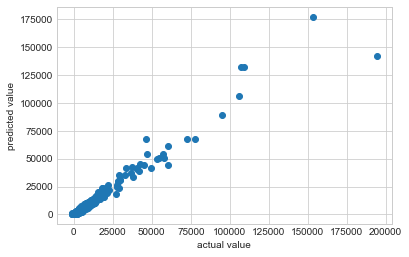

<bound method ElasticNet.fit of Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)>


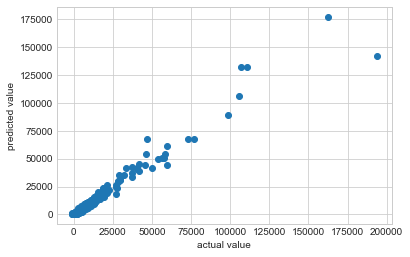

<bound method ElasticNet.fit of Lasso(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)>


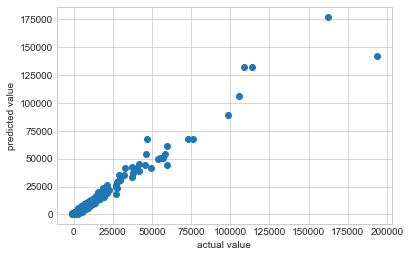

<bound method ElasticNet.fit of Lasso(alpha=0.30000000000000004, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)>


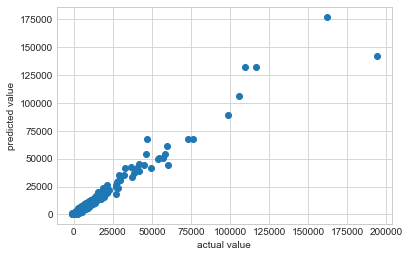

<bound method ElasticNet.fit of Lasso(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)>


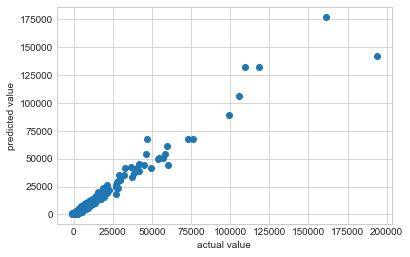

<bound method ElasticNet.fit of Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)>


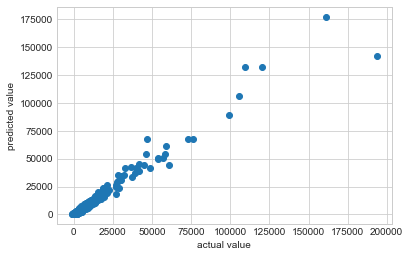

<bound method ElasticNet.fit of Lasso(alpha=0.6000000000000001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)>


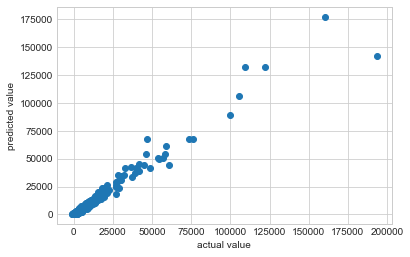

<bound method ElasticNet.fit of Lasso(alpha=0.7000000000000001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)>


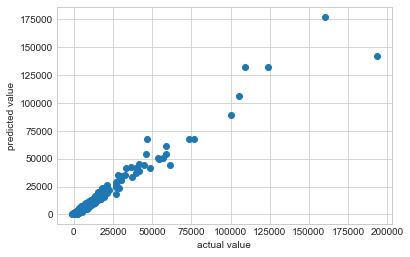

<bound method ElasticNet.fit of Lasso(alpha=0.8, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)>


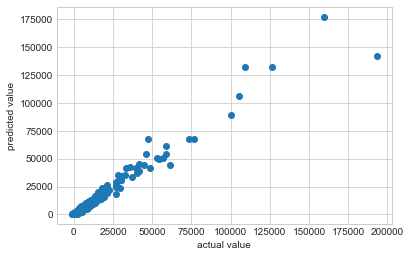

<bound method ElasticNet.fit of Lasso(alpha=0.9, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)>


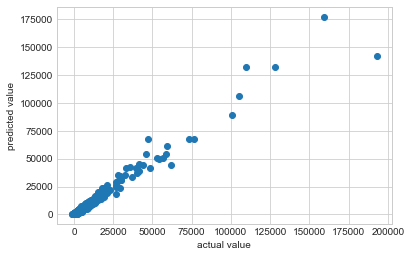

<bound method ElasticNet.fit of Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)>


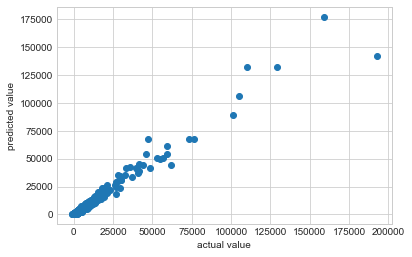

<bound method ElasticNet.fit of Lasso(alpha=1.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)>


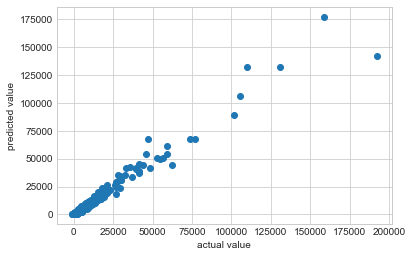

<bound method ElasticNet.fit of Lasso(alpha=1.2000000000000002, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)>


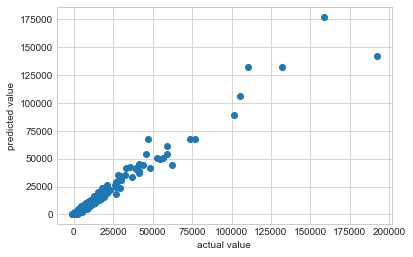

<bound method ElasticNet.fit of Lasso(alpha=1.3, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)>


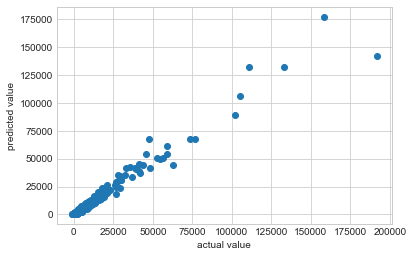

<bound method ElasticNet.fit of Lasso(alpha=1.4000000000000001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)>


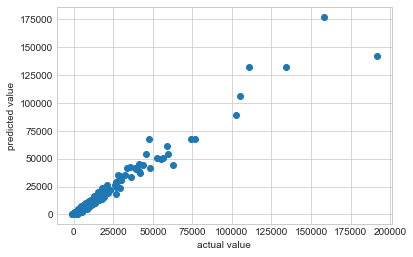

<bound method ElasticNet.fit of Lasso(alpha=1.5, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)>


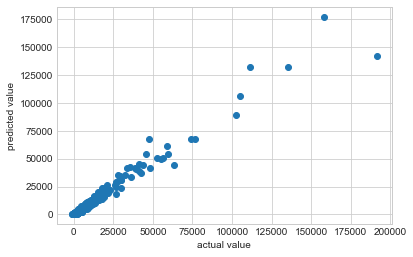

<bound method ElasticNet.fit of Lasso(alpha=1.6, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)>


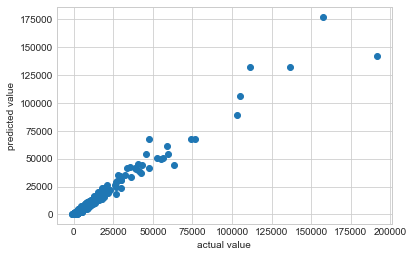

<bound method ElasticNet.fit of Lasso(alpha=1.7000000000000002, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)>


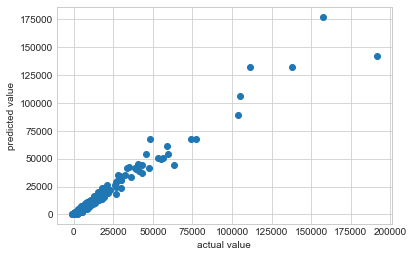

<bound method ElasticNet.fit of Lasso(alpha=1.8, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)>


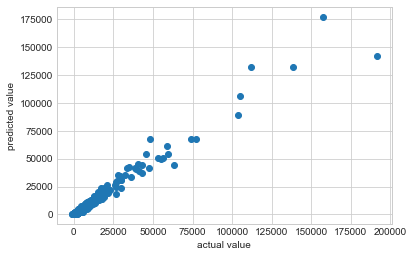

<bound method ElasticNet.fit of Lasso(alpha=1.9000000000000001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)>


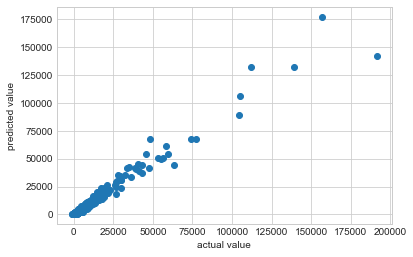

In [81]:
for x in clf_list: 

    # predict the number of diabetes, using lasso parameters
    lin_pred = x.predict(X_validate)

    # plot the residuals on a scatter plot
    plt.figure()
    plt.scatter(lin_pred, y_validate)
    plt.title(print(x.fit))
    plt.xlabel('actual value')
    plt.ylabel('predicted value')
    plt.show()

    ## hmm, looks pretty similar to the normal OLS

In [82]:


for x in clf_list:
    print(rmse(x.predict(X_validate), y_validate), x.fit)

# sliiiightly better than normal OLS :) a minimum somewhere around lambda = 1.1 to 1.3? 

3225.7825708220994 <bound method ElasticNet.fit of Lasso(alpha=0.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)>
3114.098311806068 <bound method ElasticNet.fit of Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)>
3053.039949593779 <bound method ElasticNet.fit of Lasso(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)>
3040.944965042596 <bound method ElasticNet.fit of Lasso(alpha=0.30000000000000004, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start

## Trying out Ridge Regression

In [83]:


clf_list = []

# iterating between different tuning parameters from 0 to 2 and collecting in clf_list

for a in np.arange(0,0.11,0.01):
    x = linear_model.Ridge(alpha=a)
    x.fit(X_train, y_train)
    clf_list.append(x)

<bound method Ridge.fit of Ridge(alpha=0.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)>


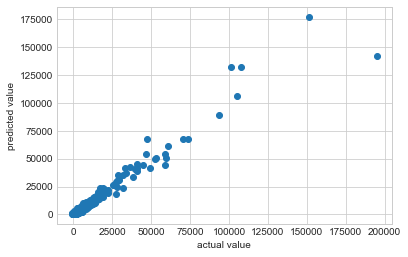

<bound method Ridge.fit of Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)>


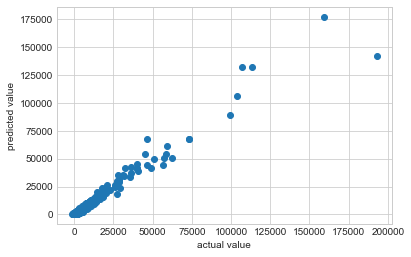

<bound method Ridge.fit of Ridge(alpha=0.02, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)>


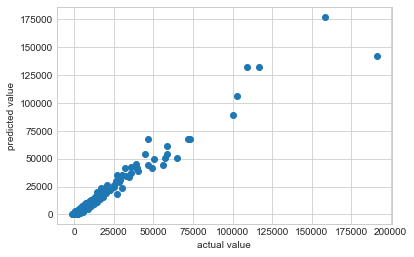

<bound method Ridge.fit of Ridge(alpha=0.03, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)>


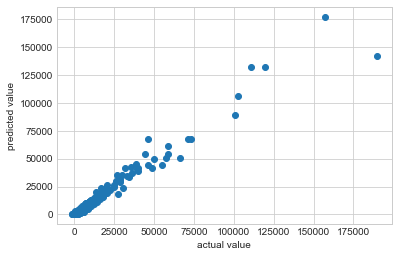

<bound method Ridge.fit of Ridge(alpha=0.04, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)>


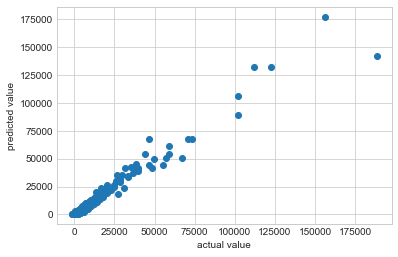

<bound method Ridge.fit of Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)>


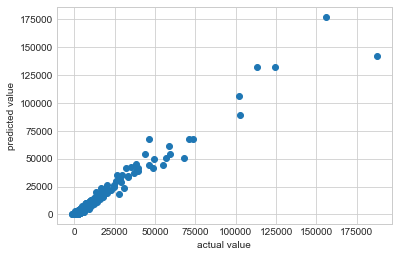

<bound method Ridge.fit of Ridge(alpha=0.06, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)>


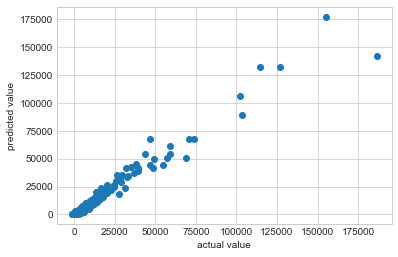

<bound method Ridge.fit of Ridge(alpha=0.07, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)>


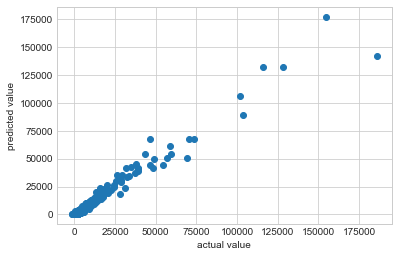

<bound method Ridge.fit of Ridge(alpha=0.08, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)>


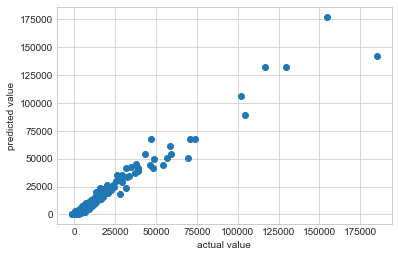

<bound method Ridge.fit of Ridge(alpha=0.09, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)>


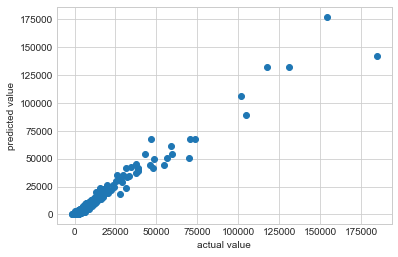

<bound method Ridge.fit of Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)>


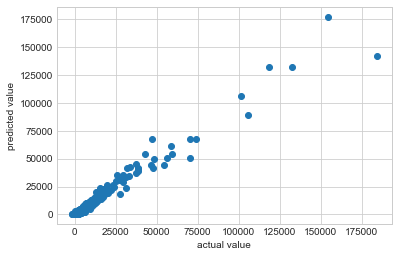

In [84]:
for x in clf_list: 

    # predict the number of diabetes, using lasso parameters
    lin_pred = x.predict(X_validate)

    # plot the residuals on a scatter plot
    plt.figure()
    plt.scatter(lin_pred, y_validate)
    plt.title(print(x.fit))
    plt.xlabel('actual value')
    plt.ylabel('predicted value')
    plt.show()



In [85]:
for x in clf_list:
    print(rmse(x.predict(X_validate), y_validate), x.fit)
    
    
# alpha between 0.0 and 0.1? around 0.09

3364.600635289718 <bound method Ridge.fit of Ridge(alpha=0.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)>
3130.888856864471 <bound method Ridge.fit of Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)>
3078.271527203437 <bound method Ridge.fit of Ridge(alpha=0.02, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)>
3040.985269358446 <bound method Ridge.fit of Ridge(alpha=0.03, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)>
3014.8777859727675 <bound method Ridge.fit of Ridge(alpha=0.04, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)>
2997.0585845791716 <bound method Ridge.fit of Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max

## MONICA TO ADD FROM THIS POINT FORWARD
## 5. Validate and Refine Models

In [86]:
#Predict on the Validation Set - Paul did this already


In [88]:
#5.2 Feature Selection
param_grid = {'alpha': np.arange(0.0, 0.1),
               'normalize': ['True', 'False'],
             'fit_intercept': ['True', 'False'],
             'solver': ['auto', 'svd', 'cholesky', 'lsqr']}

ridge_grid_reg = GridSearchCV(x, param_grid, cv=3, iid=False)
ridge_grid_reg.fit(X_train, y_train)

best_index = np.argmax(x.cv_results_["mean_test_score"])
best_ridge_pred = x.best_estimator_.predict(X_validate)

print(x.cv_results_["params"][best_index])
print('Best CV R^2:', max(ridge_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', ridge_grid_reg.score(X_validate, y_validate))
print('Validation RMSE', rmse(best_ridge_pred, y_validate))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


AttributeError: 'Ridge' object has no attribute 'cv_results_'